## Desafío 04 - Estructurando un Proyecto de DS (parte II)

Gerick Toro - Comisión 46270

---

### I: Abstract
Deberás complementar **la parte I** con:
1. Abstracto con motivación y audiencia
2. Preguntas/Hipótesis que queremos resolver mediante el análisis de datos
3. Análisis Exploratorio de Datos (EDA)
4. Con base en las visualizaciones y resúmenes numéricos generados del desafío anterior dar recomendaciones basados en los insights observados.
5. Para esta oportunidad deberás tener avances en los apartados: Definición de objetivo, Contexto comercial, Problema Comercial, Contexto analítico, Exploración de datos (EDA)


In [1]:
# para eliminar warnings de la biblioteca seaborn
import warnings

warnings.filterwarnings("ignore")

# librerias que emplearemos en el analisis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

---
## **OBJETIVO**: Identificar los factores que más influyen en la satisfacción del cliente en vuelos comerciales

### Contexto Comercial
Somos una aerolínea enfocada en elevar la satisfacción de nuestros clientes a nuevos estándares. Nuestro objetivo es alcanzar un índice de satisfacción del 75% en valoraciones positivas. Para lograr esto, es crucial identificar los factores clave que más impactan en la experiencia del cliente, permitiéndonos enfocar nuestras estrategias de mejora de manera más efectiva.

### Problema Comercial
Para alcanzar nuestro objetivo de tener un índice de satisfacción del cliente del 75% en valoraciones positivas, es imperativo entender qué factores tienen el mayor impacto en la satisfacción del cliente. Necesitamos identificar áreas específicas de mejora que nos permitan focalizar nuestros esfuerzos y recursos de manera más eficaz.

### Contexto analítico
Para llevar a cabo el análisis y alcanzar nuestros objetivos, disponemos de los siguientes datos sobre los pasajeros y sus experiencias de vuelo:

- **ID**: Identificador único del pasajero.
- **Gender, Age, Customer Type, Type of Travel, Class**: Información demográfica y de tipo de viaje.
- **Flight Distance, Departure Delay, Arrival Delay**: Detalles del vuelo.
- **Ratings en diferentes áreas**: Servicio a bordo, comodidad del asiento, servicio de espacio para piernas, limpieza, comida y bebida, servicio durante el vuelo, servicio de WiFi en vuelo, entretenimiento en vuelo, manejo de equipaje.
- **Satisfaction**: Nivel de satisfacción del cliente.
Con estos datos, planeamos realizar un análisis exploratorio para identificar los factores que más influyen en la satisfacción del cliente.

In [2]:
# URL donde tenemos almacenados los dataframes
url = "https://raw.githubusercontent.com/gerickt/coder/main/Data/AirlinePassengerSatisfaction/airline_passenger_satisfaction.csv"
dic = "https://raw.githubusercontent.com/gerickt/coder/main/Data/AirlinePassengerSatisfaction/data_dictionary.csv"
# Construyendo los dataframes
airline_data = pd.read_csv(url, index_col=0)
data_dictionary = pd.read_csv(dic, index_col=0)
# airline_data = pd.read_csv("../Data/AirlinePassengerSatisfaction/airline_passenger_satisfaction.csv", index_col=0)
# data_dictionary = pd.read_csv("../Data/AirlinePassengerSatisfaction/data_dictionary.csv", index_col=0)

---
### Exploración de Datos

#### Primera exploración

In [3]:
airline_data.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
data_dictionary.head(23)

,Description
Field,
ID,Unique passenger identifier
Gender,Gender of the passenger (Female/Male)
Age,Age of the passenger
Customer Type,Type of airline customer (First-time/Returning)
Type of Travel,Purpose of the flight (Business/Personal)
Class,Travel class in the airplane for the passenger...
Flight Distance,Flight distance in miles
Departure Delay,Flight departure delay in minutes
Arrival Delay,Flight arrival delay in minutes


### **Paso 1 Definir la estructura**
Primero, debemos ser claros sobre qué queremos lograr con este dataset para orientar nuestro análisis de manera efectiva.

**Objetivo**: Identificar los factores que más influyen en la satisfacción del cliente en vuelos comerciales.

**Variable Target**: Binaria. Será 1 si el cliente está "Satisfecho" y 0 si está "Neutral o Insatisfecho".

**Features**: Todas las otras columnas del dataset que no sean la variable target, como demografía del cliente, detalles del vuelo, y calificaciones en diferentes áreas.

In [5]:
# Variable Target binaria basada en Satisfaction
airline_data["Satisfaction"] = airline_data["Satisfaction"].map(
    {"Satisfied": 1, "Neutral or Dissatisfied": 0}
)

#### Evaluando valores vacíos

- Devemos evaluar si existen valores vacios en la variable target o en alguna de las features

In [6]:
# Hay vacios en nuestr variable target
airline_data["Satisfaction"].isnull().value_counts()

Satisfaction
False    129880
Name: count, dtype: int64

In [7]:
# Verificar la presencia de valores nulos o NaN en todo el dataset
missing_values = airline_data.isnull().sum()
print(missing_values)

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [8]:
# que registros no tienen "Arrival Delay"?
airline_data.loc[airline_data["Arrival Delay"].isnull() == True,]

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
247,Male,11,Returning,Business,Business,719,38,NaN,1,1,...,4,4,3,4,4,3,4,4,4,0
884,Male,39,Returning,Business,Business,396,0,NaN,3,5,...,3,4,3,3,3,3,3,3,3,1
1966,Male,36,Returning,Business,Economy,383,2,NaN,4,4,...,5,2,2,2,2,2,2,2,3,1
2408,Female,55,Returning,Business,Business,2904,58,NaN,5,5,...,4,3,4,4,5,4,4,4,4,0
2449,Male,21,Returning,Personal,Economy Plus,767,5,NaN,3,1,...,4,1,2,1,1,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129001,Male,46,First-time,Business,Business,2704,7,NaN,3,3,...,4,4,2,4,4,4,3,4,3,0
129004,Female,17,First-time,Business,Economy,2704,0,NaN,3,3,...,2,1,4,1,1,3,3,1,4,0
129015,Male,57,Returning,Business,Business,2704,0,NaN,4,4,...,4,4,4,5,2,4,4,4,4,1


In [9]:
# podemos asumir que no tuvieron retraso y poner 0, pero consideramos que es mejor tratar con el promedio
# Rellando los nulos de "Arrial Delay" con el promedio
promedio_arrivalDelay = airline_data["Arrival Delay"].mean()
airline_data["Arrival Delay"].fillna(promedio_arrivalDelay, inplace=True)

In [10]:
# Verificamos si queda algun valor nulo en el dataframe
airline_data.isnull().sum().any()

False

In [11]:
# Resumen estadístico para identificar posibles valores atípicos
airline_data.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,0.434463
std,15.119360,997.452477,38.071126,38.407410,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.495688
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


#### Preprocesamiento de outlieres

- Al parecer en las columnas de Delay (Departure y Arrival), tenemos outlieres muy grandes (mas de 1500 minutos lo cual es muy atipico).
- Según la aerolinea, lo usual es hasta 120 minutos de retraso tanto para llegadas y salidas, siendo lo optimo 0 (ontime)

In [12]:
# Trabajaremos sobre 2 variables, Retraso en salida/llegada,
retraso_salida = airline_data["Departure Delay"]
retraso_llegada = airline_data["Arrival Delay"]
print(retraso_salida.describe())
print(retraso_llegada.describe())

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay, dtype: float64
count    129880.000000
mean         15.091129
std          38.407410
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64


In [13]:
# creamos una función para usar el metodo IQR de detección de outlieres
def Outlier_IQR(outlier):
    primer_cuartil = outlier.quantile(0.25)
    tercer_cuartil = outlier.quantile(0.75)
    rango_intercuartilico = tercer_cuartil - primer_cuartil

    # Limites 0 para ontime y 9 para aproximarnos a los 120 minutos
    limite_inf = primer_cuartil - (0 * rango_intercuartilico)
    limite_sup = tercer_cuartil + (9 * rango_intercuartilico)
    return limite_inf, limite_sup

In [14]:
outliers_salida = Outlier_IQR(retraso_salida)
outliers_llegada = Outlier_IQR(retraso_llegada)

print(outliers_salida)
print(outliers_llegada)

(0.0, 120.0)
(0.0, 130.0)


In [15]:
# generamos una nueva columna para identificar los outlieres en Salidas
airline_data["Outlier_IQR_Departure"] = np.where(
    (airline_data["Departure Delay"] < outliers_salida[0])
    | (airline_data["Departure Delay"] > outliers_salida[1]),
    1,
    0,
)
airline_data["Outlier_IQR_Departure"].value_counts()

Outlier_IQR_Departure
0    126787
1      3093
Name: count, dtype: int64

In [16]:
# generamos una nueva columna para identificar los outlieres en Llegadas
airline_data["Outlier_IQR_Arrival"] = np.where(
    (airline_data["Arrival Delay"] < outliers_llegada[0])
    | (airline_data["Arrival Delay"] > outliers_llegada[1]),
    1,
    0,
)
airline_data["Outlier_IQR_Arrival"].value_counts()

Outlier_IQR_Arrival
0    127138
1      2742
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers en salidas - Metodo IQR')

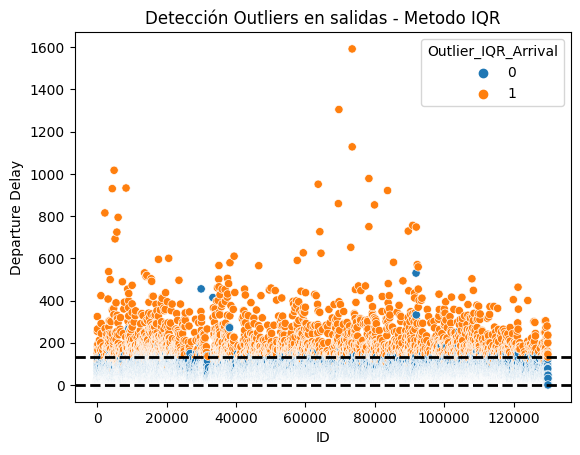

In [17]:
# Grafico de los outlieres identificados en salidas
plt.figure()
sns.scatterplot(
    data=airline_data, x="ID", y="Departure Delay", hue="Outlier_IQR_Arrival"
)
plt.axhline(
    y=outliers_llegada[0],
    color="black",
    linestyle="--",
    label="Limite Inferior",
    linewidth=2,
)
plt.axhline(
    y=outliers_llegada[1],
    color="black",
    linestyle="--",
    label="Limite Superior",
    linewidth=2,
)
plt.title("Detección Outliers en salidas - Metodo IQR")

In [18]:
# # Eliminar outliers en la columna de "Departure Delay"
filtered_airline_data = airline_data[airline_data["Outlier_IQR_Departure"] == 0]

# Eliminar outliers en la columna de "Arrival Delay"
filtered_airline_data = filtered_airline_data[airline_data["Outlier_IQR_Arrival"] == 0]

In [19]:
# Calculamos la perdida de datos despues de eliminar los outlieres
original_data_count = len(airline_data)
filtered_data_count = len(filtered_airline_data)
data_lost_percentage = (
    (original_data_count - filtered_data_count) / original_data_count
) * 100

print(f"Datos perdidos: {round(data_lost_percentage,2)}%")

Datos perdidos: 2.56%


Text(0.5, 1.0, 'Detección Outliers en salidas - Metodo IQR')

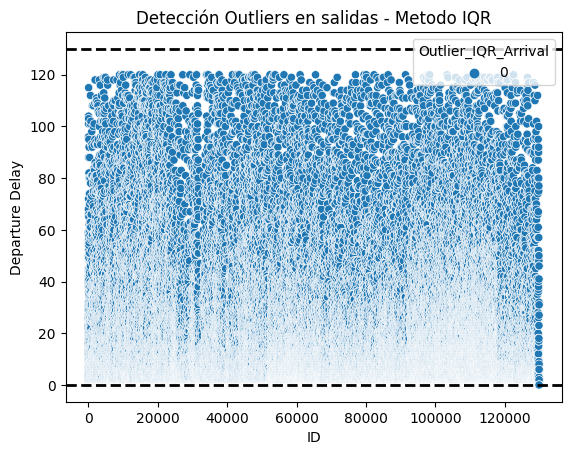

In [20]:
# Grafico sin outlieres
plt.figure()
sns.scatterplot(
    data=filtered_airline_data, x="ID", y="Departure Delay", hue="Outlier_IQR_Arrival"
)
plt.axhline(
    y=outliers_llegada[0],
    color="black",
    linestyle="--",
    label="Limite Inferior",
    linewidth=2,
)
plt.axhline(
    y=outliers_llegada[1],
    color="black",
    linestyle="--",
    label="Limite Superior",
    linewidth=2,
)
plt.title("Detección Outliers en salidas - Metodo IQR")

In [21]:
# Consideramos el porcentaje bastante bajo, por lo que no impactaría al modelo para nuestro analisis
# retiramos las columnas IQR
columns_to_drop = ["Outlier_IQR_Departure", "Outlier_IQR_Arrival"]
airline_data_clean = filtered_airline_data.drop(columns_to_drop, axis=1)
# actualizamos el dataframe con los valores filtrados:
airline_data = airline_data_clean

---
### **Paso 2 Creación de Features**
- Vamos a analizar las variables para ver cual es un buen indicador de la satisfacción.
- Será necesario convertir las variables categorias a binarias, y las que tengan muchas categorias podriamos separarlas en columnas usando la tecnica **one-hot encoding**

In [22]:
# para "Gender" Male será 0 y Female 1
airline_data["Gender"] = airline_data["Gender"].map({"Male": 0, "Female": 1})
# para "Customer Type", returning será 0 y First-time será 1
airline_data["Customer Type"] = airline_data["Customer Type"].map(
    {"Returning": 0, "First-time": 1}
)
# para "Type of Travel", Business será 0 y Personal 1
airline_data["Type of Travel"] = airline_data["Type of Travel"].map(
    {"Business": 0, "Personal": 1}
)

In [23]:
# Utiliza 'get_dummies' para hacer One-Hot Encoding en la columna "Class"
airline_data_one_hot = pd.get_dummies(airline_data, drop_first=False)
airline_data_one_hot

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Business,Class_Economy,Class_Economy Plus
ID,,,,,,,,,,,,,,,,,,,,,
1,0,48,1,0,821,2,5.0,3,3,4,...,5,5,5,3,5,5,0,True,False,False
2,1,35,0,0,821,26,39.0,2,2,3,...,5,3,5,2,5,5,1,True,False,False
3,0,41,0,0,853,0,0.0,4,4,4,...,5,5,3,4,3,3,1,True,False,False
4,0,50,0,0,1905,0,0.0,2,2,3,...,4,4,5,2,5,5,1,True,False,False
5,1,49,0,0,3470,0,1.0,3,3,3,...,5,4,3,3,3,3,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129876,0,28,0,1,447,2,3.0,4,4,4,...,4,4,5,4,4,4,0,False,False,True
129877,0,41,0,1,308,0,0.0,5,3,5,...,2,2,4,3,2,5,0,False,False,True
129878,0,42,0,1,337,6,14.0,5,2,4,...,3,3,4,2,3,5,0,False,False,True


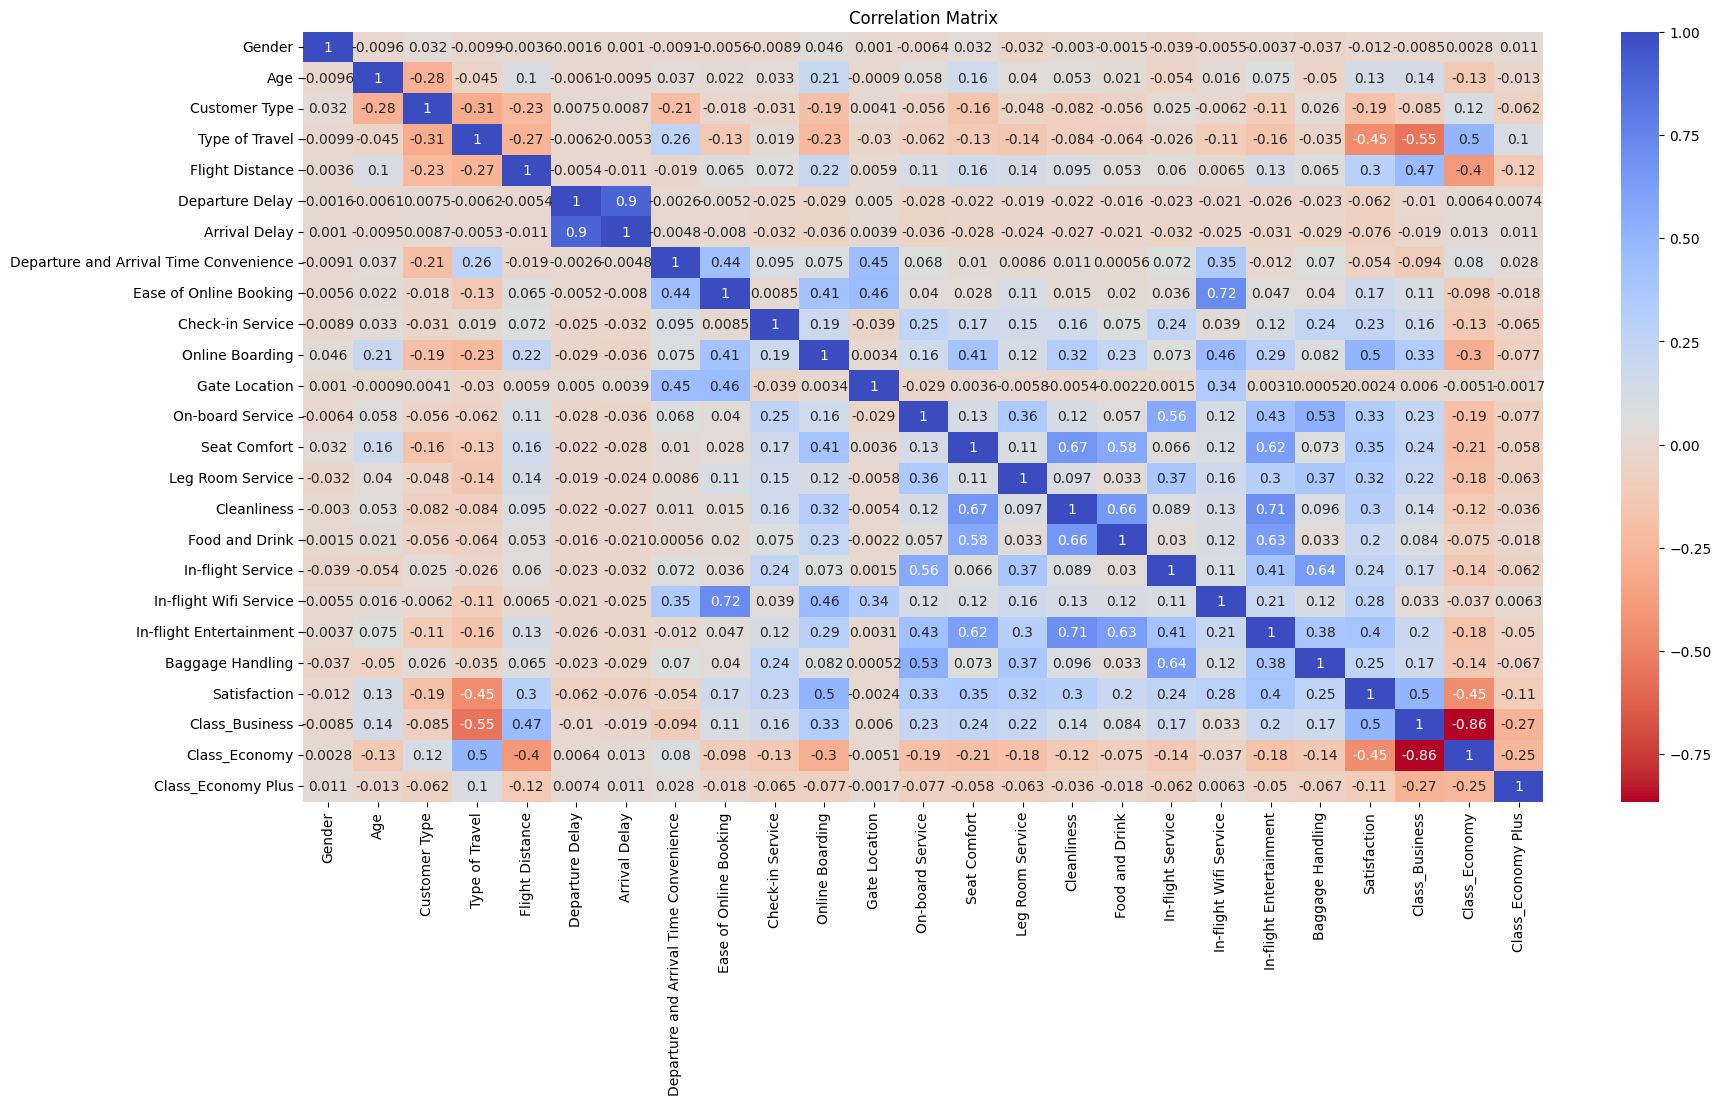

In [24]:
# Calculamos la matriz de correlación solo para todas las columnass
correlation_matrix = airline_data_one_hot.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm_r")
plt.title("Correlation Matrix")
plt.show()

Los hallazgos son interesantes...
- **Correlaciones Positivas**: Las variables que más influyen positivamente en la satisfacción del cliente son "Class_Business" y "Online Boarding", con correlaciones de aproximadamente 0.50.
- **Correlaciones Negativas**: La variable "Class_Economy" y "Type of Travel" tienen una fuerte correlación negativa de aproximadamente -0.45 con la satisfacción del cliente.
- **Otros Factores**: Otros factores como "In-flight Entertainment", "Seat Comfort", y "On-board Service" también muestran correlaciones positivas decentes, lo que significa que también son importantes para la satisfacción del cliente.

Basada en estas apreciaciones, podemos construir features.

#### **Feature 1: Índice de Satisfacción Ponderado**
- Nombre: Weighted_Satisfaction_Index
- Construcción: Combinación ponderada de "Online boarding" (ponderación de 0.5), "Inflight entertainment" (ponderación de 0.3) y "Class_Business" (ponderación de 0.2).

Estas ponderaciones están basadas en la correlación de cada variable con la satisfacción del cliente, así como en la frecuencia con la que los clientes experimentan cada factor.


In [25]:
# Creando la feature 'Weighted_Satisfaction_Index' con las ponderaciones discutidas
# 0.5 para 'Online boarding', 0.3 para 'Inflight entertainment' y 0.2 para 'Class_Business'
airline_data_one_hot["Weighted_Satisfaction_Index"] = (
    (0.5 * airline_data_one_hot["Online Boarding"])
    + (0.3 * airline_data_one_hot["In-flight Entertainment"])
    + (0.2 * airline_data_one_hot["Class_Business"])
)

In [26]:
airline_data_one_hot["Weighted_Satisfaction_Index"].describe()

count    126551.000000
mean          2.731353
std           0.918326
min           0.300000
25%           2.100000
50%           2.800000
75%           3.400000
max           4.200000
Name: Weighted_Satisfaction_Index, dtype: float64

In [27]:
# Normalizar las columnas relevantes
normalized_online_boarding = (airline_data_one_hot["Online Boarding"] - 1) / 4
normalized_inflight_entertainment = (
    airline_data_one_hot["In-flight Entertainment"] - 1
) / 4

# Crear la feature "Weighted_Satisfaction_Index" normalizada
airline_data_one_hot["Weighted_Satisfaction_Index_Normalized"] = (
    (0.5 * normalized_online_boarding)
    + (0.3 * normalized_inflight_entertainment)
    + (0.2 * airline_data_one_hot["Class_Business"])
)

In [28]:
# Mostrar la nueva feature
airline_data_one_hot[
    ["Weighted_Satisfaction_Index", "Weighted_Satisfaction_Index_Normalized"]
].head()

,Weighted_Satisfaction_Index,Weighted_Satisfaction_Index_Normalized
ID,,
1,3.2,0.750
2,4.2,1.000
3,3.6,0.850
4,3.7,0.875
5,3.6,0.850


#### **Feature 2: Razón de los Servicios en función a la Distancia del vuelo**
- Nombre: Service_per_Distance
- Construcción: Se obtiene dividiendo una métrica de "Total_Service_Score" (que podríamos crear como la suma o promedio de todas las variables de servicio) por "Flight Distance".

Este feature intenta capturar la eficiencia del servicio que un cliente recibe en relación con la distancia del vuelo. Es útil para saber si la calidad del servicio se mantiene constante a lo largo de vuelos más largos o cortos.


In [29]:
# Creando la columna 'Total_Service_Score' que es la suma de todas las variables de servicio relevantes
airline_data_one_hot["Total_Service_Score"] = (
    airline_data_one_hot["On-board Service"]
    + airline_data_one_hot["Seat Comfort"]
    + airline_data_one_hot["Leg Room Service"]
    + airline_data_one_hot["Cleanliness"]
    + airline_data_one_hot["Food and Drink"]
    + airline_data_one_hot["In-flight Service"]
    + airline_data_one_hot["Baggage Handling"]
)

# Creando la feature 'Service_per_Distance'
airline_data_one_hot["Service_per_Distance"] = (
    airline_data_one_hot["Total_Service_Score"]
    / airline_data_one_hot["Flight Distance"]
)

In [30]:
airline_data_one_hot["Service_per_Distance"].describe()

count    126551.000000
mean          0.044038
std           0.048310
min           0.002188
25%           0.013812
50%           0.027586
75%           0.055085
max           1.000000
Name: Service_per_Distance, dtype: float64

In [31]:
# Muestro las primeras filas para verificar que la columna se haya agregado correctamente
airline_data_one_hot[
    ["Total_Service_Score", "Flight Distance", "Service_per_Distance"]
].head()

,Total_Service_Score,Flight Distance,Service_per_Distance
ID,,,
1,30,821,0.036541
2,32,821,0.038977
3,27,853,0.031653
4,33,1905,0.017323
5,26,3470,0.007493


#### **Feature 3**: Experiencia Digital
- Nombre: Digital_Experience
- Construcción: Promedio de 'Ease of Online Booking' y 'In-flight Wifi Service'.

Este feature evalua qué tan fluida y agradable es la interacción del cliente con los servicios digitales de la aerolínea. Esto podría ser un indicador de la satisfacción general del cliente, especialmente en un mundo cada vez más digital.

In [32]:
# Creando la feature 'Experiencia_Digital' como una combinación de 'Ease of Online Booking' y 'In-flight Wifi Service'
airline_data_one_hot["Digital_Experience"] = (
    airline_data_one_hot["Ease of Online Booking"]
    + airline_data_one_hot["In-flight Wifi Service"]
) / 2

In [33]:
# Mostrando las primeras filas para ver las nuevas features
airline_data_one_hot[
    ["Ease of Online Booking", "In-flight Wifi Service", "Digital_Experience"]
].head()

,Ease of Online Booking,In-flight Wifi Service,Digital_Experience
ID,,,
1,3,3,3.0
2,2,2,2.0
3,4,4,4.0
4,2,2,2.0
5,3,3,3.0


#### **Feature 4**: Índice de Conveniencia General
- Nombre: General_Convenience
- Construcción: Promedio de 'Departure and Arrival Time Convenience' y 'Gate Location'.

Este feature mide el nivel de comodidad y conveniencia que el cliente experimenta en relación con los horarios de vuelo y la ubicación de la puerta. Esto podría impactar en la satisfacción general, especialmente para los viajeros frecuentes o aquellos con horarios ajustados.

In [34]:
# Creando la feature 'Indice_Conveniencia_General' como una combinación de 'Departure and Arrival Time Convenience' y 'Gate Location'
airline_data_one_hot["General_Convenience"] = (
    airline_data_one_hot["Departure and Arrival Time Convenience"]
    + airline_data_one_hot["Gate Location"]
) / 2

In [35]:
# Mostrando las primeras filas para ver las nuevas features
airline_data_one_hot[
    ["Departure and Arrival Time Convenience", "Gate Location", "General_Convenience"]
].head()

,Departure and Arrival Time Convenience,Gate Location,General_Convenience
ID,,,
1,3,3,3.0
2,2,2,2.0
3,4,4,4.0
4,2,2,2.0
5,3,3,3.0


---
### **Paso 3 EDA**
Desarrollaremos el analisis exploratorio sobre las features construidas:
- Weighted_Satisfaction_Index ó Weighted_Satisfaction_Index_Normalized
- Service_per_Distance
- Digital_Experience
- General_Convenience

#### Varabiale target: Satisfaction

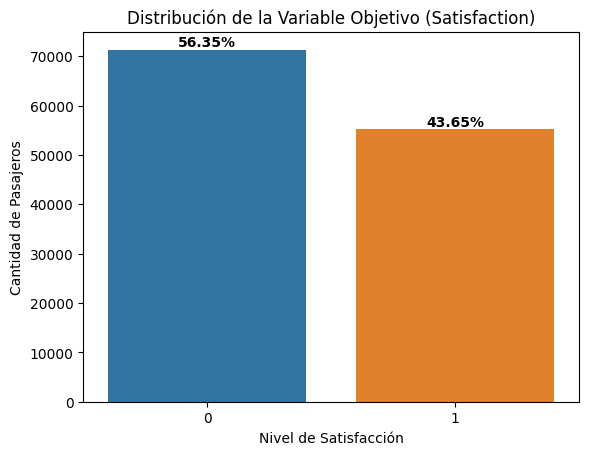

In [36]:
# Calculando la cantidad total de registros
total_count = len(airline_data_one_hot)

# Creando el gráfico de conteo
sns.countplot(data=airline_data_one_hot, x="Satisfaction")
plt.xlabel("Nivel de Satisfacción")
plt.ylabel("Cantidad de Pasajeros")
plt.title("Distribución de la Variable Objetivo (Satisfaction)")

# Anotando porcentajes en las barras
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    percentage = (int(y_text) / total_count) * 100  # Calcula el porcentaje
    ax.text(
        x_text,
        y_text,
        f"{percentage:.2f}%",  # Indica posición x e y, y texto a mostrar
        ha="center",  # Alineación horizontal
        va="bottom",  # Alineación vertical
        fontsize=10,
        color="black",
        fontweight="bold",
    )

plt.show()

Se puede observar que el 43.65% de los pasajeros se encuentran satisfechos


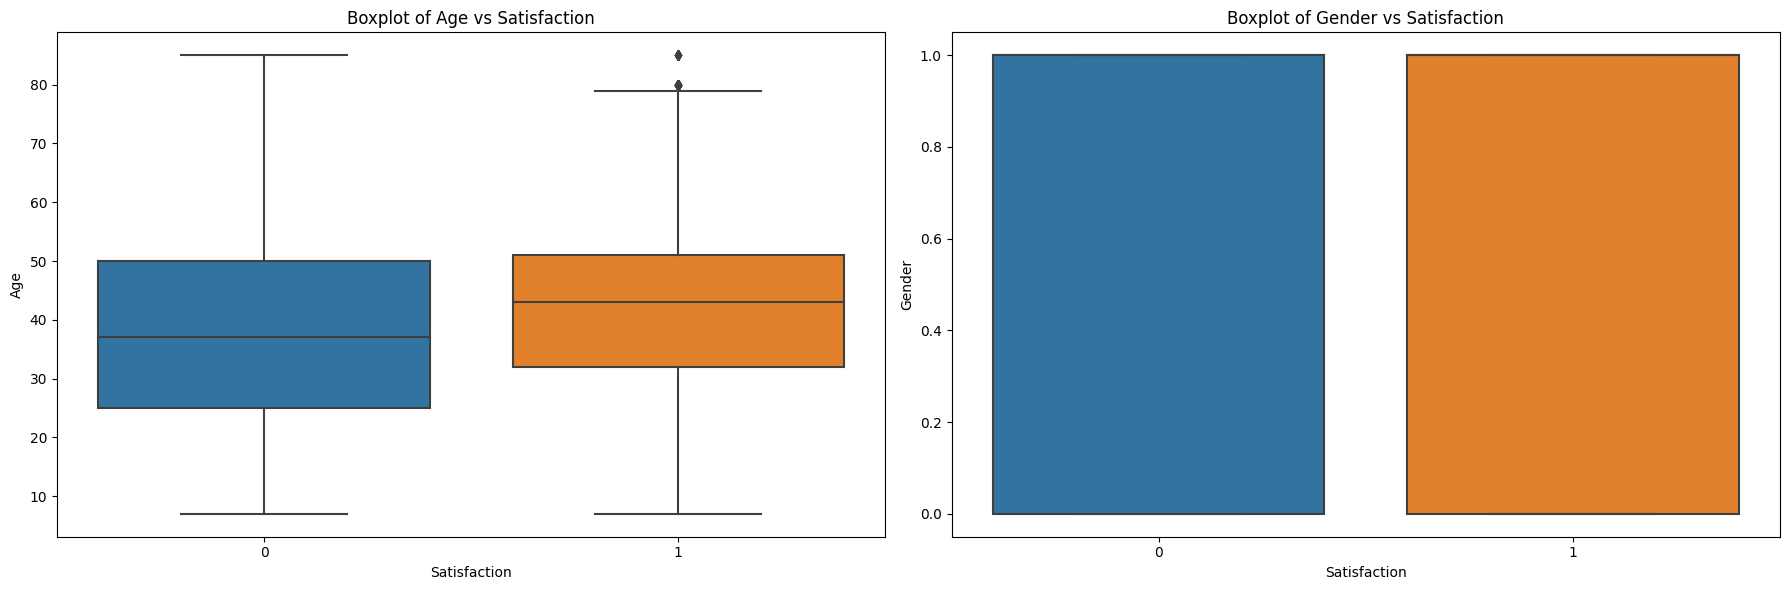

In [37]:
# Ahora generamos los boxplots para "Satisfaction" con respecto a las variables "Age", "Gender", y "Class"
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot para "Age"
sns.boxplot(x="Satisfaction", y="Age", data=airline_data_one_hot, ax=axes[0])
axes[0].set_title("Boxplot of Age vs Satisfaction")

# Boxplot para "Gender"
sns.boxplot(x="Satisfaction", y="Gender", data=airline_data_one_hot, ax=axes[1])
axes[1].set_title("Boxplot of Gender vs Satisfaction")

plt.tight_layout()
plt.show()

- Edad vs Satisfacción: No hay una gran diferencia en la distribución de edades entre los clientes satisfechos y los no satisfechos.

- Género vs Satisfacción: La mediana parece ser la misma para hombres y mujeres en términos de satisfacción. No se nota un patrón claro aquí.


#### **Primera conclusión:**
Hay una distribución casi igual entre clientes satisfechos y no satisfechos, lo cual es un buen punto de partida para un modelo predictivo.

----
### Information Value
Para homogenenizar el cálculo, dividamos nuestros 4 features en los siguientes rangos: 
* menor a -0.1
* entre -0.1 y -0-05
* entre -0.05 y 0.05
* entre 0.5 y 0.1
* mayor a 0.1


In [38]:
# Definimos los cortes bin
bin_edges = [-np.inf, -0.1, -0.05, 0.05, 0.1, np.inf]
bin_labels = ["< -0.1", "-0.1 a -0.05", "-0.05 a 0.05", "0.05 a 0.1", "> 0.1"]

# lista de las columnas donde aplicaremos el corte
features_to_bin = [
    "Weighted_Satisfaction_Index_Normalized",
    "Service_per_Distance",
    "Digital_Experience",
    "General_Convenience",
]

for feature in features_to_bin:
    airline_data_one_hot[f"{feature}_Bin"] = pd.cut(
        airline_data_one_hot[feature],
        bins=bin_edges,
        labels=bin_labels,
        include_lowest=True,
    )

# exploramos
airline_data_one_hot.head()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,Weighted_Satisfaction_Index,Weighted_Satisfaction_Index_Normalized,Total_Service_Score,Service_per_Distance,Digital_Experience,General_Convenience,Weighted_Satisfaction_Index_Normalized_Bin,Service_per_Distance_Bin,Digital_Experience_Bin,General_Convenience_Bin
ID,,,,,,,,,,,,,,,,,,,,,
1,0,48,1,0,821,2,5.0,3,3,4,...,3.2,0.750,30,0.036541,3.0,3.0,> 0.1,-0.05 a 0.05,> 0.1,> 0.1
2,1,35,0,0,821,26,39.0,2,2,3,...,4.2,1.000,32,0.038977,2.0,2.0,> 0.1,-0.05 a 0.05,> 0.1,> 0.1
3,0,41,0,0,853,0,0.0,4,4,4,...,3.6,0.850,27,0.031653,4.0,4.0,> 0.1,-0.05 a 0.05,> 0.1,> 0.1
4,0,50,0,0,1905,0,0.0,2,2,3,...,3.7,0.875,33,0.017323,2.0,2.0,> 0.1,-0.05 a 0.05,> 0.1,> 0.1
5,1,49,0,0,3470,0,1.0,3,3,3,...,3.6,0.850,26,0.007493,3.0,3.0,> 0.1,-0.05 a 0.05,> 0.1,> 0.1


In [49]:
# Genero un dataframe que voy a ir completando con cada IV
IV_df = pd.DataFrame(columns=["Variable", "IV"])

In [50]:
print(type(IV_df))

<class 'pandas.core.frame.DataFrame'>


In [52]:
# Funcion para calcular (IV)
def calculate_IV(feature, target, df):
    # Agrupamos
    tabla_IV = (
        df.groupby(feature)
        .agg(
            Cant=(target, "count"),
            Cant_Exito=(target, "sum"),
            Tasa_Exito=(target, "mean"),
        )
        .reset_index()
    )
    tabla_IV["Tasa_No_Exito"] = 1 - tabla_IV["Tasa_Exito"]
    tabla_IV["Cant_No_Exito"] = tabla_IV["Cant"] - tabla_IV["Cant_Exito"]
    tabla_IV["LN"] = np.log(
        (tabla_IV["Tasa_Exito"] + 1e-7) / (tabla_IV["Tasa_No_Exito"] + 1e-7)
    )  # Agregamos epsilon para evitar una division entre cero
    tabla_IV["Pct_Exitos"] = tabla_IV["Cant_Exito"] / sum(tabla_IV["Cant_Exito"])
    tabla_IV["Pct_NoExitos"] = tabla_IV["Cant_No_Exito"] / sum(
        tabla_IV["Cant_No_Exito"]
    )
    tabla_IV["Resta"] = tabla_IV["Pct_Exitos"] - tabla_IV["Pct_NoExitos"]
    tabla_IV["IV"] = tabla_IV["Resta"] * tabla_IV["LN"]

    # Calculamos y devolvemos el valor de IV para la feature
    IV = sum(tabla_IV["IV"])
    return IV


# Liste de las features
features_to_calculate_IV = [
    "Weighted_Satisfaction_Index_Normalized_Bin",
    "Service_per_Distance_Bin",
    "Digital_Experience_Bin",
    "General_Convenience_Bin",
]

# calculamos las IV para todas las features de la lista
for feature in features_to_calculate_IV:
    IV = calculate_IV(feature, "Satisfaction", airline_data_one_hot)
    new_row = pd.DataFrame({"Variable": feature, "IV": IV}, index=[0])
    IV_df = pd.concat([IV_df, new_row], ignore_index=True)

IV_df

,Variable,IV
0,Weighted_Satisfaction_Index_Normalized_Bin,0.093553
1,Service_per_Distance_Bin,NaN
2,Digital_Experience_Bin,NaN
3,General_Convenience_Bin,NaN


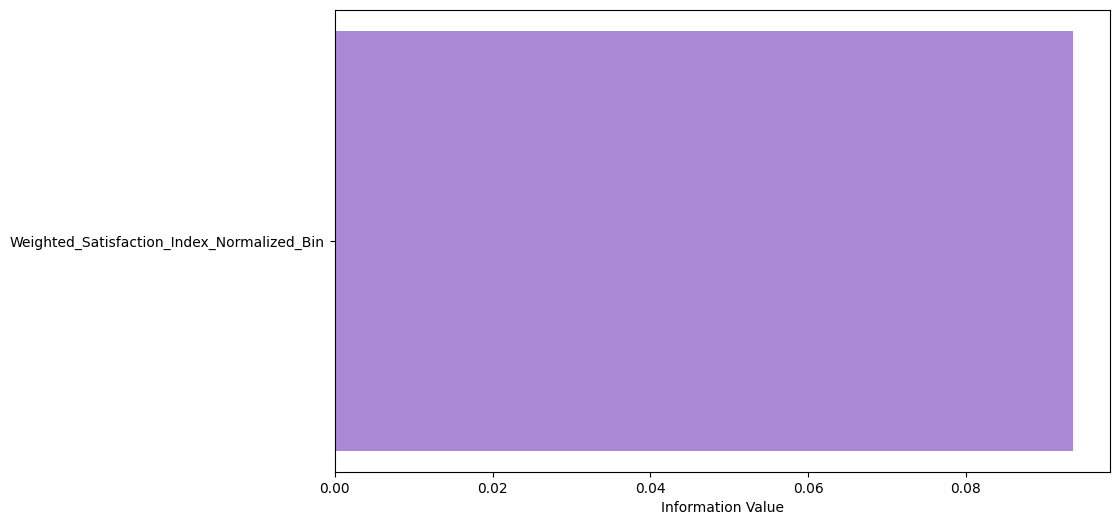

In [53]:
# Grafico el information value de cada variable
IV_df = IV_df.sort_values(by="IV", ascending=False)
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(IV_df["Variable"], IV_df["IV"], color="#A989D6")
plt.xlabel("Information Value")
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()


#### **Segunda conclusión:**
Parece que la paramatrización de las variables de las features a bins, no generaron datos correctos, solo la variable Weighd_Satisfaction_Index_Normalized_Bin, se pudo graficar.
Esta parte debe revisarse.

### Analisis Bivariado
Veremos la relación entre la variable target y la feature

Text(0.5, 1.0, 'Relación entre el Indice de Satisfacción ponderado y la variable target')

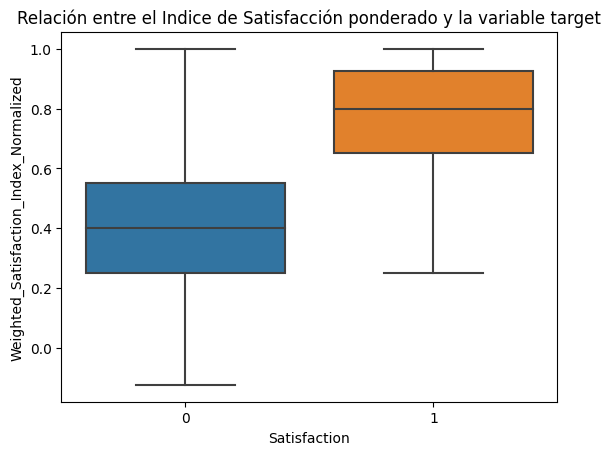

In [56]:
# Boxplot
plt.figure()
sns.boxplot(
    data=airline_data_one_hot,
    x="Satisfaction",
    y="Weighted_Satisfaction_Index_Normalized",
    showfliers=False,
)
plt.title("Relación entre el Indice de Satisfacción ponderado y la variable target")

Como se puede ver en el boxplot la distribución difiere bastante para los clientes satisfechos

In [57]:
# Emplearemos la libreria statsmodels para verificar el grafico usando un modelo de regersion lineal simple
import statsmodels.formula.api as sm

In [59]:
model1 = "Weighted_Satisfaction_Index_Normalized ~ Satisfaction"
lm1 = sm.ols(formula=model1, data=airline_data_one_hot).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     Weighted_Satisfaction_Index_Normalized   R-squared:                       0.418
Model:                                                OLS   Adj. R-squared:                  0.418
Method:                                     Least Squares   F-statistic:                 9.091e+04
Date:                                    Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                                            21:45:17   Log-Likelihood:                 19797.
No. Observations:                                  126551   AIC:                        -3.959e+04
Df Residuals:                                      126549   BIC:                        -3.957e+04
Df Model:                                               1                                         
Covariance Type:                                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4004      0.001    516.671      0.000       0.399       0.402
Satisfaction     0.3536      0.001    301.518      0.000       0.351       0.356
==============================================================================
Omnibus:                    10369.194   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14286.951
Skew:                          -0.689   Prob(JB):                         0.00
Kurtosis:                       3.901   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Conclusiones finlaes**
Después de llevar a cabo un análisis inicial de los factores que contribuyen a la satisfacción del cliente, hemos identificado algunos puntos clave que podrían ser de interés para la aerolínea. El modelo actual muestra que hay una relación significativa entre el "Índice de Satisfacción Ponderado Normalizado" y la "Satisfacción" general del cliente, aunque sólo explica el 41.8% de la variabilidad en la satisfacción del cliente.

Aunque el índice de satisfacción ponderado es un buen indicador, claramente no es el único factor que afecta la experiencia del cliente. Esto indica la necesidad de explorar otros factores para una estrategia de mejora más completa.